In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle datasets download -d salader/dogs-vs-cats --force

 99% 1.05G/1.06G [00:10<00:00, 158MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


In [3]:
import zipfile

In [16]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
 import tensorflow as tf
 from tensorflow import keras
 from keras import Sequential
 from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [17]:
keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
 def process (image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)


In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.datasets.mnist as mnist
train_ds = keras.utils.image_dataset_from_directory
validation_ds= keras.utils.image_dataset_from_directory

In [54]:
import cv2

In [65]:
test_image = cv2.imread('/content/jamie-street-6CcB5TDNqkQ-unsplash.jpg')

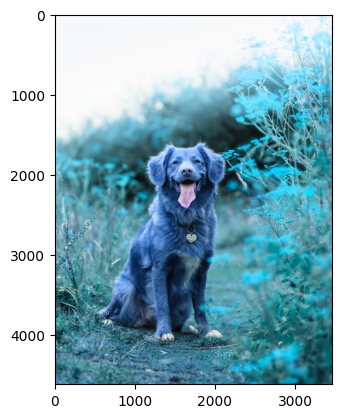

In [66]:
plt.imshow(test_image)

In [67]:
test_image.shape

(4618, 3464, 3)

In [68]:
test_image = cv2.resize(test_image,(256,256))

In [69]:
test_input = test_image.reshape(1,256,256,3)

In [70]:
model.predict(test_input)

1/1 [==============================] - 0s 66ms/step


array([[2.2845642e-12]], dtype=float32)